## Wine dataset Clustering

In [1]:
#importing header files
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading and displaying dataset
data=pd.read_csv("C:/Users/deepesh/Downloads/wine_clust.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
x=data.iloc[:,0:13]

## KMeans Clustering

In [7]:
#import KMeans from sklearn
from sklearn.cluster import KMeans

## Deciding No. of clusters using Elbow Method

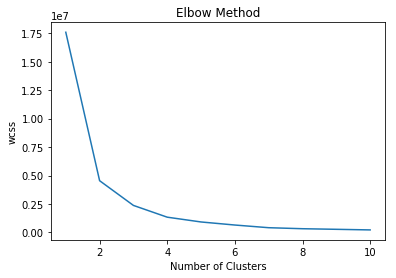

In [8]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
data=data.iloc[:,[0,12]].values

In [10]:
# Number of Clusters=3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(data)
y_kmeans=kmeans.fit_predict(data)

In [11]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
# Silhouette score calculation
sil_avg=silhouette_score(data,y_kmeans)
print(sil_avg)

0.5809325234492815


In [14]:
#Number of Clusters=4
kmeans1=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans1.fit(data)
y_kmeans1=kmeans1.fit_predict(data)

In [15]:
sil_avg1=silhouette_score(data,y_kmeans1)
print(sil_avg1)

0.5750407161124561


In [16]:
#Number of clusters=2
kmeans2=KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans2.fit(data)
y_kmeans2=kmeans2.fit_predict(data)

In [17]:
sil_avg2=silhouette_score(data,y_kmeans2)
print(sil_avg2)

0.6605508700594223


### Silhouette score is more (0.66055087) when No.of Clusters=2

## Hierarchical Agglomerative Clustering

In [18]:
import scipy.cluster.hierarchy as sch

### Draw Dendogram to decide No.of Clusters

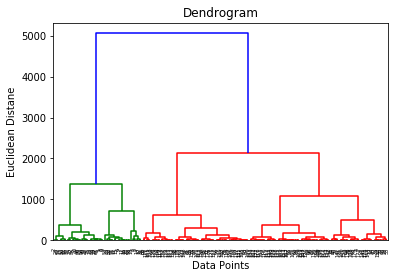

In [19]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distane')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
#With Number of Clusters=2 doing Agglomerative Hierarchical Clustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [22]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [23]:
from sklearn.metrics import silhouette_score

#### Calculating Silhouette Score

In [24]:
sil_avg_hc=silhouette_score(data,y_hc)
print(sil_avg_hc)

0.6605196082796134


In [25]:
#With Number of Clusters=3 doing Agglomerative Hierarchical Clustering

hc1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc1=hc1.fit_predict(data)

In [26]:
sil_avg_hc1=silhouette_score(data,y_hc1)
print(sil_avg_hc1)

0.5651817250182133


###### Silhouette score is more (0.660519608) when No.of Clusters=2

## DBSCAN Clustering

In [27]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

[2 0 1 0 2 2 3 1 0 0 3 0 1 0 2 1 1 2 3 3 2 2 1 3 3 1 2 1 3 1 0 0 1 0 0 0 0
 0 3 2 1 3 1 1 3 3 0 3 0 2 3 2 0 2 2 3 0 3 0 2 0 1 0 3 3 3 0 2 0 3 1 3 0 3
 3 0 3 1 2 0 2 1 2 2 0 1 2 1 0 0 1 2 0 3 3 1 2 2 1 3 0 2 0 2 1 2 2 1 0 1 3
 3 2 0 2 1 0 2 2 1 3 2 3 2 2 2 2 3 2 3 0 3 3 2 0 3 3 0 1 0 0 3 1 3 1 3 0 1
 0 0 0 1 0 1 2 3 0 3 2 1 0 1 1 2 1 3 3 1 2 1 1 0 2 1 3 0 2 2 1 3 2 1 3 3 1
 1 1 1 2 0 1 3 1 1 3 3 3 1 3 0 1 3 2 3 1 0 3 0 1 0 1 3 1 1 0 3 3 2 2 1 0 2
 2 3 2 3 1 0 0 1 1 0 1 2 3 1 2 3 0 3 2 1 2 0 0 0 0 3 3 0 1 3 2 1 3 3 3 2 2
 0 1 1 3 2 0 3 1 0 1 2 2 3 3 1 2 2 2 1 0 0 2 2 1 2 2 2 0 3 0 1 2 2 0 0 0 2
 2 1 0 3]
['y', 'b', 'g', 'r']


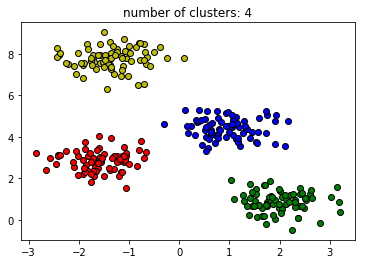

Silhouette Coefficient:0.74
Adjusted Rand Index: 1.00


In [28]:
 # Load data in X
x, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.8, min_samples=14).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
# Plot result
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(x, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f"%ari)

#### Silhouette score is more(.74) For DBSCAN with No.of Clusters=4